In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import MinMaxScaler
from sklearn.preprocessing import RobustScaler
from scipy import stats

In [2]:
df = pd.read_csv(r"fifa.csv")
df.head()

,ID,Name,Age,Photo,Nationality,Flag,Overall,Potential,Club,Club Logo,...,Composure,Marking,StandingTackle,SlidingTackle,GKDiving,GKHandling,GKKicking,GKPositioning,GKReflexes,Release Clause
0,158023,L. Messi,31,https://cdn.sofifa.org/players/4/19/158023.png,Argentina,https://cdn.sofifa.org/flags/52.png,94,94,FC Barcelona,https://cdn.sofifa.org/teams/2/light/241.png,...,96.0,33.0,28.0,26.0,6.0,11.0,15.0,14.0,8.0,€226.5M
1,20801,Cristiano Ronaldo,33,https://cdn.sofifa.org/players/4/19/20801.png,Portugal,https://cdn.sofifa.org/flags/38.png,94,94,Juventus,https://cdn.sofifa.org/teams/2/light/45.png,...,95.0,28.0,31.0,23.0,7.0,11.0,15.0,14.0,11.0,€127.1M
2,190871,Neymar Jr,26,https://cdn.sofifa.org/players/4/19/190871.png,Brazil,https://cdn.sofifa.org/flags/54.png,92,93,Paris Saint-Germain,https://cdn.sofifa.org/teams/2/light/73.png,...,94.0,27.0,24.0,33.0,9.0,9.0,15.0,15.0,11.0,€228.1M
3,193080,De Gea,27,https://cdn.sofifa.org/players/4/19/193080.png,Spain,https://cdn.sofifa.org/flags/45.png,91,93,Manchester United,https://cdn.sofifa.org/teams/2/light/11.png,...,68.0,15.0,21.0,13.0,90.0,85.0,87.0,88.0,94.0,€138.6M
4,192985,K. De Bruyne,27,https://cdn.sofifa.org/players/4/19/192985.png,Belgium,https://cdn.sofifa.org/flags/7.png,91,92,Manchester City,https://cdn.sofifa.org/teams/2/light/10.png,...,88.0,68.0,58.0,51.0,15.0,13.0,5.0,10.0,13.0,€196.4M


In [3]:
df.dtypes

ID                            int64
Name                         object
Age                           int64
Photo                        object
Nationality                  object
Flag                         object
Overall                       int64
Potential                     int64
Club                         object
Club Logo                    object
Value                        object
Wage                         object
Preferred Foot               object
International Reputation    float64
Weak Foot                   float64
Skill Moves                 float64
Work Rate                    object
Body Type                    object
Position                     object
Jersey Number               float64
Joined                       object
Loaned From                  object
Contract Valid Until         object
Height                       object
Weight                       object
Crossing                    float64
Finishing                   float64
HeadingAccuracy             

In [4]:
df[["Value"]]

,Value
0,€110.5M
1,€77M
2,€118.5M
3,€72M
4,€102M
...,...
18202,€60K
18203,€60K
18204,€60K
18205,€60K


In [5]:
df["Value"] = df["Value"].replace("[€]","",regex = True)
df["Value"] = df['Value'].replace({'K' : '*1e3', 'M' : '*1e6'}, regex = True).map(pd.eval).astype(int)
df["Value"]

0        110500000
1         77000000
2        118500000
3         72000000
4        102000000
           ...    
18202        60000
18203        60000
18204        60000
18205        60000
18206        60000
Name: Value, Length: 18207, dtype: int64

In [6]:
df["Wage"] = df["Wage"].replace("[€]","",regex = True)
df["Wage"] = df['Wage'].replace({'K': '*1e3', 'M': '*1e6'}, regex = True).map(pd.eval).astype(int)
df["Wage"]

0        565000
1        405000
2        290000
3        260000
4        355000
          ...  
18202      1000
18203      1000
18204      1000
18205      1000
18206      1000
Name: Wage, Length: 18207, dtype: int64

In [7]:
df["Joined"] = pd.to_datetime(df["Joined"])
df["Joined"] = pd.DatetimeIndex(df["Joined"]).year
df["Joined"].fillna(df["Joined"].median(),inplace = True)
df["Joined"] = df["Joined"].astype(int)
df["Joined"]

0        2004
1        2018
2        2017
3        2011
4        2015
         ... 
18202    2017
18203    2018
18204    2017
18205    2018
18206    2018
Name: Joined, Length: 18207, dtype: int64

In [8]:
df["Contract Valid Until"] = pd.to_datetime(df["Contract Valid Until"])
df["Contract Valid Until"]

0       2021-01-01
1       2022-01-01
2       2022-01-01
3       2020-01-01
4       2023-01-01
           ...    
18202   2019-01-01
18203   2020-01-01
18204   2021-01-01
18205   2019-01-01
18206   2019-01-01
Name: Contract Valid Until, Length: 18207, dtype: datetime64[ns]

In [9]:
df["Height"] = df["Height"].replace("'",".",regex = True)
df["Height"].astype(float)
df[["Height"]]

,Height
0,5.7
1,6.2
2,5.9
3,6.4
4,5.11
...,...
18202,5.9
18203,6.3
18204,5.8
18205,5.10


In [10]:
df["Weight"] = df["Weight"].replace("lbs","",regex = True)
df["Weight"] = df["Weight"].astype(float)
df["Weight"]

0        159.0
1        183.0
2        150.0
3        168.0
4        154.0
         ...  
18202    134.0
18203    170.0
18204    148.0
18205    154.0
18206    176.0
Name: Weight, Length: 18207, dtype: float64

In [11]:
df["Release Clause"]
df["Release Clause"].mode()

0    €1.1M
dtype: object

In [12]:
df["Release Clause"].fillna(value = "€1.1M",inplace = True)
df["Release Clause"] = df["Release Clause"].replace("[€]","",regex = True)
df["Release Clause"] = df['Release Clause'].replace({'K' : '*1e3', 'M' : '*1e6'}, regex = True).map(pd.eval).astype(int)

In [13]:
Missing_values_percentage = (df.isnull().sum() / len(df)) * 100
Missing_values_percentage

ID                           0.000000
Name                         0.000000
Age                          0.000000
Photo                        0.000000
Nationality                  0.000000
Flag                         0.000000
Overall                      0.000000
Potential                    0.000000
Club                         1.323667
Club Logo                    0.000000
Value                        0.000000
Wage                         0.000000
Preferred Foot               0.263635
International Reputation     0.263635
Weak Foot                    0.263635
Skill Moves                  0.263635
Work Rate                    0.263635
Body Type                    0.263635
Position                     0.329544
Jersey Number                0.329544
Joined                       0.000000
Loaned From                 93.057615
Contract Valid Until         1.587302
Height                       0.263635
Weight                       0.263635
Crossing                     0.263635
Finishing   

In [14]:
df.drop("Loaned From",axis = 1,inplace = True)
df.columns

Index(['ID', 'Name', 'Age', 'Photo', 'Nationality', 'Flag', 'Overall',
       'Potential', 'Club', 'Club Logo', 'Value', 'Wage', 'Preferred Foot',
       'International Reputation', 'Weak Foot', 'Skill Moves', 'Work Rate',
       'Body Type', 'Position', 'Jersey Number', 'Joined',
       'Contract Valid Until', 'Height', 'Weight', 'Crossing', 'Finishing',
       'HeadingAccuracy', 'ShortPassing', 'Volleys', 'Dribbling', 'Curve',
       'FKAccuracy', 'LongPassing', 'BallControl', 'Acceleration',
       'SprintSpeed', 'Agility', 'Reactions', 'Balance', 'ShotPower',
       'Jumping', 'Stamina', 'Strength', 'LongShots', 'Aggression',
       'Interceptions', 'Positioning', 'Vision', 'Penalties', 'Composure',
       'Marking', 'StandingTackle', 'SlidingTackle', 'GKDiving', 'GKHandling',
       'GKKicking', 'GKPositioning', 'GKReflexes', 'Release Clause'],
      dtype='object')

In [15]:
df.head()

,ID,Name,Age,Photo,Nationality,Flag,Overall,Potential,Club,Club Logo,...,Composure,Marking,StandingTackle,SlidingTackle,GKDiving,GKHandling,GKKicking,GKPositioning,GKReflexes,Release Clause
0,158023,L. Messi,31,https://cdn.sofifa.org/players/4/19/158023.png,Argentina,https://cdn.sofifa.org/flags/52.png,94,94,FC Barcelona,https://cdn.sofifa.org/teams/2/light/241.png,...,96.0,33.0,28.0,26.0,6.0,11.0,15.0,14.0,8.0,226500000
1,20801,Cristiano Ronaldo,33,https://cdn.sofifa.org/players/4/19/20801.png,Portugal,https://cdn.sofifa.org/flags/38.png,94,94,Juventus,https://cdn.sofifa.org/teams/2/light/45.png,...,95.0,28.0,31.0,23.0,7.0,11.0,15.0,14.0,11.0,127100000
2,190871,Neymar Jr,26,https://cdn.sofifa.org/players/4/19/190871.png,Brazil,https://cdn.sofifa.org/flags/54.png,92,93,Paris Saint-Germain,https://cdn.sofifa.org/teams/2/light/73.png,...,94.0,27.0,24.0,33.0,9.0,9.0,15.0,15.0,11.0,228100000
3,193080,De Gea,27,https://cdn.sofifa.org/players/4/19/193080.png,Spain,https://cdn.sofifa.org/flags/45.png,91,93,Manchester United,https://cdn.sofifa.org/teams/2/light/11.png,...,68.0,15.0,21.0,13.0,90.0,85.0,87.0,88.0,94.0,138600000
4,192985,K. De Bruyne,27,https://cdn.sofifa.org/players/4/19/192985.png,Belgium,https://cdn.sofifa.org/flags/7.png,91,92,Manchester City,https://cdn.sofifa.org/teams/2/light/10.png,...,88.0,68.0,58.0,51.0,15.0,13.0,5.0,10.0,13.0,196400000


In [16]:
df.drop(["Photo","Flag","Club Logo"],axis = 1,inplace = True)
df.columns

Index(['ID', 'Name', 'Age', 'Nationality', 'Overall', 'Potential', 'Club',
       'Value', 'Wage', 'Preferred Foot', 'International Reputation',
       'Weak Foot', 'Skill Moves', 'Work Rate', 'Body Type', 'Position',
       'Jersey Number', 'Joined', 'Contract Valid Until', 'Height', 'Weight',
       'Crossing', 'Finishing', 'HeadingAccuracy', 'ShortPassing', 'Volleys',
       'Dribbling', 'Curve', 'FKAccuracy', 'LongPassing', 'BallControl',
       'Acceleration', 'SprintSpeed', 'Agility', 'Reactions', 'Balance',
       'ShotPower', 'Jumping', 'Stamina', 'Strength', 'LongShots',
       'Aggression', 'Interceptions', 'Positioning', 'Vision', 'Penalties',
       'Composure', 'Marking', 'StandingTackle', 'SlidingTackle', 'GKDiving',
       'GKHandling', 'GKKicking', 'GKPositioning', 'GKReflexes',
       'Release Clause'],
      dtype='object')

In [17]:
df["Height"] = df["Height"].astype(float)
df.dtypes

ID                                   int64
Name                                object
Age                                  int64
Nationality                         object
Overall                              int64
Potential                            int64
Club                                object
Value                                int64
Wage                                 int64
Preferred Foot                      object
International Reputation           float64
Weak Foot                          float64
Skill Moves                        float64
Work Rate                           object
Body Type                           object
Position                            object
Jersey Number                      float64
Joined                               int64
Contract Valid Until        datetime64[ns]
Height                             float64
Weight                             float64
Crossing                           float64
Finishing                          float64
HeadingAccu

In [18]:
df["Work Rate"].unique()

array(['Medium/ Medium', 'High/ Low', 'High/ Medium', 'High/ High',
       'Medium/ High', 'Medium/ Low', 'Low/ High', 'Low/ Medium',
       'Low/ Low', nan], dtype=object)

In [19]:
df["Body Type"].unique()

array(['Messi', 'C. Ronaldo', 'Neymar', 'Lean', 'Normal', 'Courtois',
       'Stocky', 'PLAYER_BODY_TYPE_25', 'Shaqiri', 'Akinfenwa', nan],
      dtype=object)

# EXPLORATORY DATA ANALYSIS

/Users/greashkalai/opt/anaconda3/lib/python3.8/site-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='Overall', ylabel='Density'>

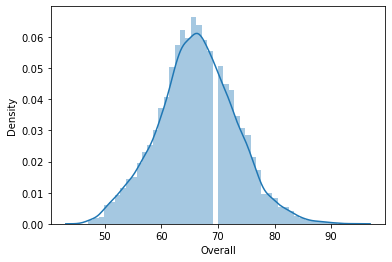

In [20]:
sns.distplot(df["Overall"])

/Users/greashkalai/opt/anaconda3/lib/python3.8/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='Overall'>

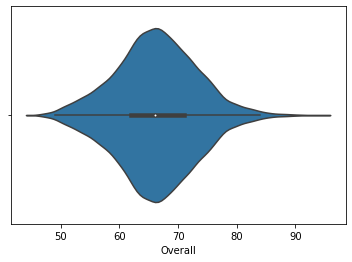

In [45]:
sns.violinplot(df['Overall'])

# The Overall rating for most of  the players are ranging from 50  to 80 

In [21]:
df1 = df[["Overall", "Value","Wage", "International Reputation", "Height", "Weight", "Release Clause"]]
df1.head()

,Overall,Value,Wage,International Reputation,Height,Weight,Release Clause
0,94,110500000,565000,5.0,5.70,159.0,226500000
1,94,77000000,405000,5.0,6.20,183.0,127100000
2,92,118500000,290000,5.0,5.90,150.0,228100000
3,91,72000000,260000,4.0,6.40,168.0,138600000
4,91,102000000,355000,4.0,5.11,154.0,196400000


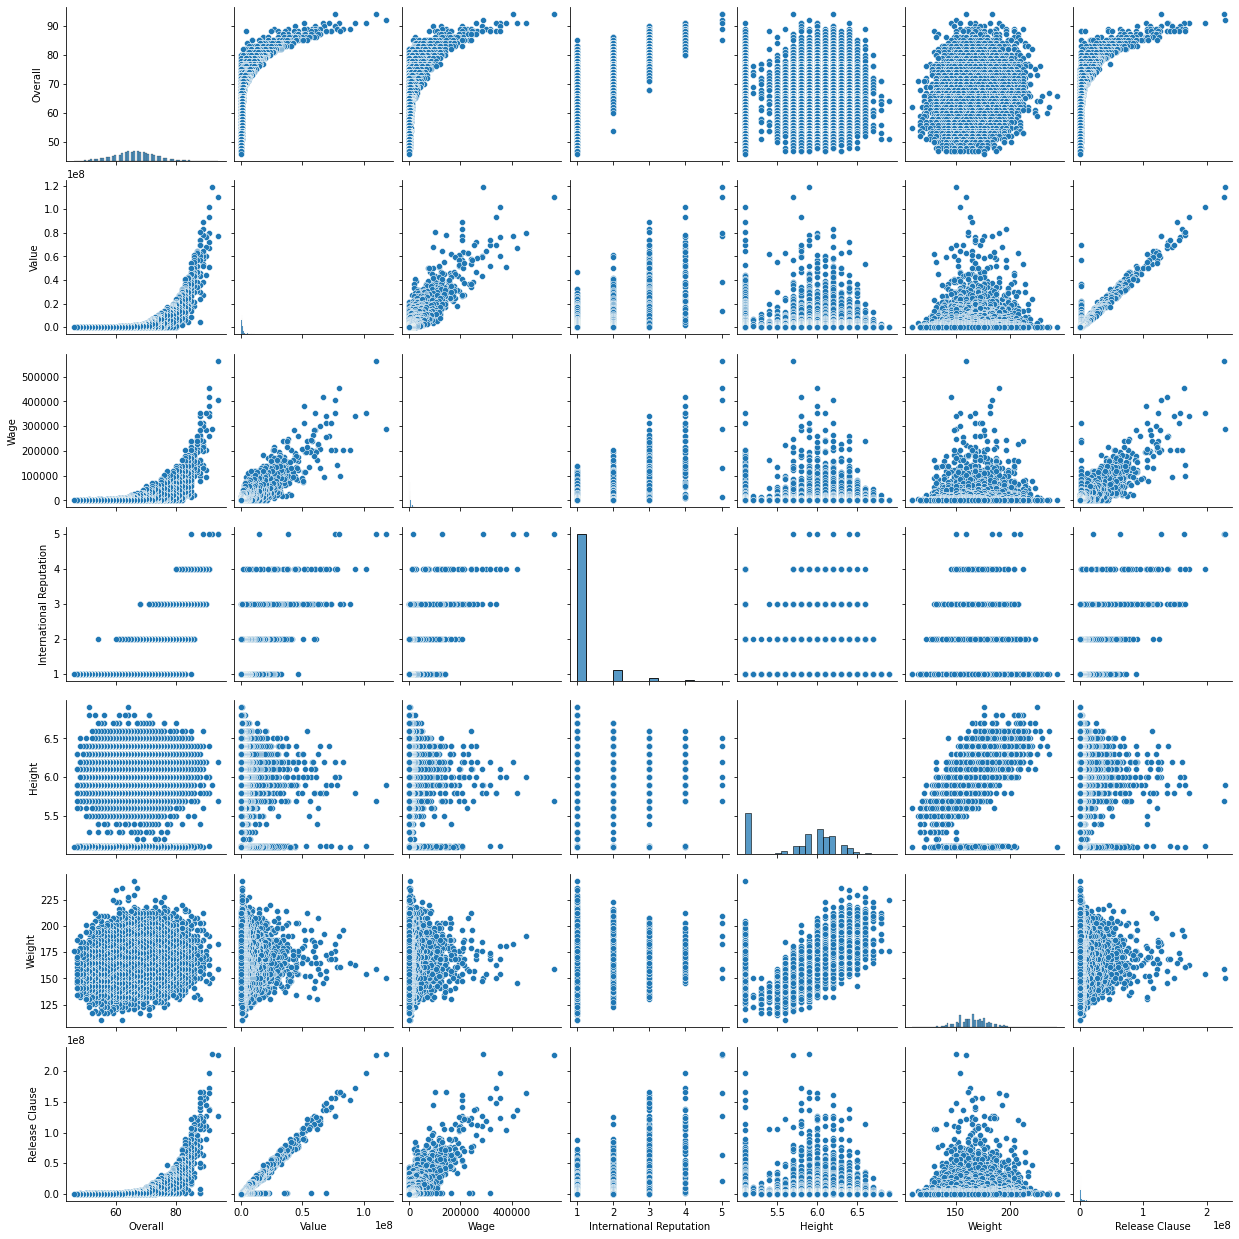

In [46]:
sns.pairplot(df1)

# OBSERVATIONS FROM THE PAIR PLOT

# 1. Most of the players wage is low but their rating is high

# 2. As the market value of the player increases the release clause value also increases

# 3. As the overall rating of the player increases the market value typically increases

In [24]:
df.dtypes

ID                                   int64
Name                                object
Age                                  int64
Nationality                         object
Overall                              int64
Potential                            int64
Club                                object
Value                                int64
Wage                                 int64
Preferred Foot                      object
International Reputation           float64
Weak Foot                          float64
Skill Moves                        float64
Work Rate                           object
Body Type                           object
Position                            object
Jersey Number                      float64
Joined                               int64
Contract Valid Until        datetime64[ns]
Height                             float64
Weight                             float64
Crossing                           float64
Finishing                          float64
HeadingAccu

In [25]:
df["Contract Valid Until"]

0       2021-01-01
1       2022-01-01
2       2022-01-01
3       2020-01-01
4       2023-01-01
           ...    
18202   2019-01-01
18203   2020-01-01
18204   2021-01-01
18205   2019-01-01
18206   2019-01-01
Name: Contract Valid Until, Length: 18207, dtype: datetime64[ns]

In [26]:
df["Contract Valid Until"] = df["Contract Valid Until"].dt.year
df["Contract Valid Until"] = df["Contract Valid Until"].fillna(df["Contract Valid Until"].median())

df["Contract Valid Until"] = df["Contract Valid Until"].astype(int)
df[["Contract Valid Until"]]

,Contract Valid Until
0,2021
1,2022
2,2022
3,2020
4,2023
...,...
18202,2019
18203,2020
18204,2021
18205,2019


In [27]:
df2 = df[df["Contract Valid Until"] == 2020]
pl = df2.loc[:,["Name","Overall"]]
pl.sort_values(by = ["Overall"],axis = 0,ascending = False,inplace = True,ignore_index = True)
pl.head(20)

,Name,Overall
0,De Gea,91
1,L. Modrić,91
2,Sergio Ramos,91
3,E. Hazard,91
4,David Silva,90
5,E. Cavani,89
6,G. Chiellini,89
7,C. Eriksen,88
8,Thiago Silva,88
9,D. Mertens,87


# The above table represents players with top 20 overall rating and whose contract expires by 2020

In [28]:
wage_df = df2.loc[:,["Name","Overall","Wage","Age","Value"]]
wage_df.sort_values(by = ["Overall"],axis = 0,ascending = False,inplace = True,ignore_index = True)
wage_df_20 = wage_df.head(20)

In [29]:
wage_df_20["Wage"].mean()

205450.0

# The average wage for the top 20 players is 205.45

In [30]:
wage_df_20["Age"].mean()

30.65

# The average age for the top 20 players is 30.65

In [47]:
wage_df1 = df2.loc[:,["Overall","Value"]]

In [48]:
wage_df1.corr()

,Overall,Value
Overall,1.000000,0.611151
Value,0.611151,1.000000


<AxesSubplot:>

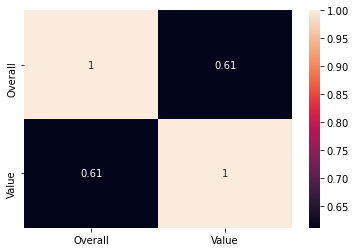

In [49]:
sns.heatmap(wage_df1.corr(), annot = True)

In [52]:
wage_df2 = np.triu(np.ones_like(wage_df1.corr()))
wage_df2

array([[1., 1.],
       [0., 1.]])

<AxesSubplot:>

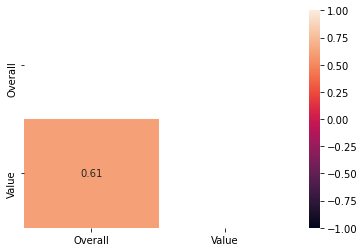

In [53]:
sns.heatmap(wage_df1.corr(), annot = True, vmin = -1, vmax = 1, mask = wage_df2)

# There is a strong positive correlation between overall rating and value

In [32]:
df["Position"].fillna(df["Position"].mode(),inplace = True)
df["Position"].unique()

array(['RF', 'ST', 'LW', 'GK', 'RCM', 'LF', 'RS', 'RCB', 'LCM', 'CB',
       'LDM', 'CAM', 'CDM', 'LS', 'LCB', 'RM', 'LAM', 'LM', 'LB', 'RDM',
       'RW', 'CM', 'RB', 'RAM', 'CF', 'RWB', 'LWB', nan], dtype=object)

In [33]:
table = df.groupby('Position').apply(lambda x: x.sort_values('Overall', ascending = False)).reset_index(drop = True)

In [34]:
table_final =  table.groupby("Position").head(5)

In [35]:
table_final[["Position"]].head(10)

,Position
0,CAM
1,CAM
2,CAM
3,CAM
4,CAM
958,CB
959,CB
960,CB
961,CB
962,CB


In [36]:
s = table_final["Name"].value_counts().to_frame()

In [37]:
s.reset_index(inplace = True)

In [38]:
s.rename(columns = {"index" : "Name","Name" : "Count"},inplace = True)

In [39]:
s

,Name,Count
0,M. Özil,1
1,Z. Ibrahimović,1
2,L. Messi,1
3,Gerard Moreno,1
4,Cristiano Ronaldo,1
...,...,...
130,Sergio Busquets,1
131,S. Milinković-Savić,1
132,L. Insigne,1
133,M. Hamšík,1


In [40]:
s[s["Count"] > 1]

,Name,Count


# There are no players who is appearing in more than one table.

In [58]:
top_5 = table_final.groupby("Position")["Wage"].mean()
top_5

Position
CAM    174000
CB     139600
CDM    217000
CF      47400
CM     130600
GK     192800
LAM     81600
LB     177200
LCB    162000
LCM    184400
LDM    126600
LF     121200
LM     164600
LS     130200
LW     261000
LWB     34200
RAM     45400
RB     155400
RCB    231000
RCM    240800
RDM    105000
RF     148000
RM     131400
RS     132200
RW     202000
RWB     44200
ST     294000
Name: Wage, dtype: int64

<AxesSubplot:xlabel='Position'>

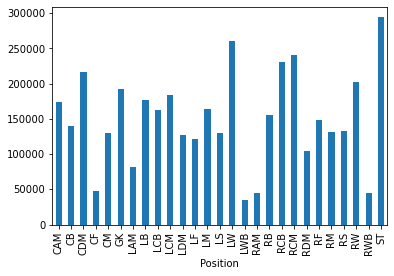

In [61]:
top_5.plot(kind = 'bar')

/Users/greashkalai/opt/anaconda3/lib/python3.8/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='SprintSpeed', ylabel='Finishing'>

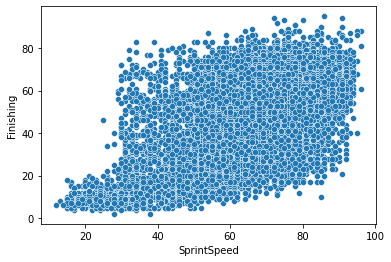

In [42]:
sns.scatterplot(df["SprintSpeed"],df["Finishing"])

/Users/greashkalai/opt/anaconda3/lib/python3.8/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='Preferred Foot', ylabel='LongPassing'>

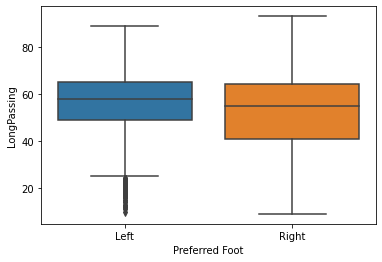

In [43]:
sns.boxplot(df["Preferred Foot"],df["LongPassing"])

/Users/greashkalai/opt/anaconda3/lib/python3.8/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='Weight', ylabel='Acceleration'>

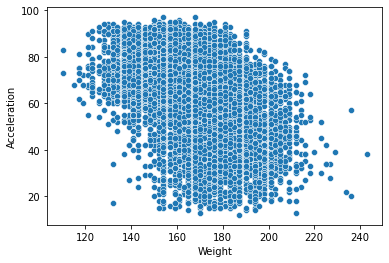

In [44]:
sns.scatterplot(df["Weight"],df["Acceleration"])